In [37]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>✌ ¡Hola a todos! Un saludo... Vamos a Empezar ✌ </b></marquee><center>

<table>
    <tr>
        <td><img src="https://s3.amazonaws.com/media-p.slid.es/uploads/1485763/images/9060062/Header.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">    <FONT COLOR="blue">  K-means </p> Clustering en Textos  </FONT>         </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">PLN </p></tp>
            <tp><p style="font-size:115%;text-align:center">Pregrado MACC 2023-2</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Fabián Sánchez</p></tp>
        </td>
    </tr>
</table>

**Objetivo de la sesión**:

En esta sesión revisaremos el método de k-means y lo aplicaremos a la agrupación o clustering en textos.

Inicialmente, daremos los conceptos básicos del método y un ejemplo general. Luego, aplicaremos los conceptos para un ejercicio particular aplicado en el contexto del procesamiento de lenguaje natural.

Primero, cargaremos las librerías clásicas

In [38]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# librerías para procesar
import numpy as np
import pandas as pd

# expresiones regulares
import re

# librerías para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# librería de PLN en español
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')

# Count vectorizer usando NLTK
from sklearn.feature_extraction.text import TfidfVectorizer

# Para el algoritmo k-means
from sklearn.cluster import KMeans

# Algunos elementos de preprocesamiento: escalamiento y selección de k en k-means
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

# Para los algotitmos de machine learning
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

from sklearn.metrics import pairwise_distances_argmin_min

#Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")

# <FONT SIZE=5 COLOR="purple"> 1. Algoritmo k-means </FONT>

**Generalidades**

Tomado de [Joaquin](https://rpubs.com/Joaquin_AR/310338) y de [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- La base de $k$-means fue propuesta por *Stuart Lloyd* en 1957 para la modulación por impulsos codificados. Luego evolucionó con la idea de *Hugo Steinhaus*.

- El término $k$-means clustering fue utilizado por primera vez po *MacQueen en 1967*, es uno de los algoritmos de agrupamiento más simples y más utilizados.

- Es uno de los métodos no supervisados que se usa para dividir un conjunto de individuos (registros del Conjunto de Datos) en un conjunto de $k$ grupos (es decir, ***$k$ clusters***), donde $k$ representa el número de grupos preestablecidos. Este algoritmo busca que los objetos ***dentro del mismo cluster*** sean lo más similares posibles (es decir, alta similitud intraclase), mientras que ***distintos clusters*** sean lo más diferente posible (es decir, baja similitud entre clases).

- En el $k$-means clustering, cada grupo está representado por su centro (es decir, ***centroide***) que corresponde a la media de puntos asignados al ***cluster***.

- $k$-means clustering encuentra los $k$ mejores clusters, entendiendo como mejor cluster aquel cuya varianza interna (within-cluster variation) sea lo más pequeña posible.

- Se trata por lo tanto de un problema de optimización, en el que se reparten las observaciones en $k$ clusters de forma que la suma de las varianzas internas de todos ellos sea lo menor posible. Para poder solucionar este problema es necesario definir un modo de cuantificar la varianza interna, que veremos más adelante.

<br>
<center><img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*JsfEdbXKwJw_Euprvx17KA.png?raw=true" alt="centered image" width="500" height="300">https://miro.medium.com</center>


**Algoritmo de  k-means**

- El primer paso cuando se usa el algoritmo es indicar el número  $k$  de clusters que se desean obtener. El algoritmo comienza seleccionando aleatoriamente $k$ objetos del conjunto de datos para que sirvan como centroides iniciales de los cluster.

- Seguido, cada uno de los registros restantes se asigna a su centroide más cercano (asignación de clúster), donde más cercano se asigna por la distacia euclideana.

- Después del paso de asignación, el algoritmo calcula el nuevo centroide de cada cluster (actualización del centroide). Ahora que los centroides se han vuelto a calcular, para cada observación se verifican las distancias para determinar si podría estar más cerca a un clúster diferente.

La selección de los centroides está basada en el ***diagrama de Voronoi*** en el que a cada observación de un grupo se le asigna la media más cercana. Si tenemos $\{\mu_1^{1}, \mu_2^{1}, \dots, \mu_k^{1}\}$ centroides iniciales, entonces

$$C_i^{t} = \{x_j  \, : \, \|x_j-\mu_i^{t} \|\leq \| x_j -  \mu_j^{t}\| \quad 1 \leq j \leq k\}$$

donde cada $x_j$ está en exactamente uno de los $C_i^{t}$.

Los nuevos centroides están dados por el centroide de las observaciones en el grupo

$$\mu_i^{t+1}= \dfrac{1}{|C_{i}^{t}|}\sum \limits_{x_j \in C_i^{t}} x_j$$

<br>
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/2/25/Fortunes-algorithm.gif" alt="drawing" width="350" height = "300"/></center>



- Todos los objetos se reasignan nuevamente utilizando el centroide actualizado del clúster.

Los pasos de asignación de cluster y actualización del centroide se repiten iterativamente hasta que las asignaciones de clústeres dejan de cambiar (se logra la convergencia), es decir, los clusters formados en la iteración actual son los mismos que los obtenidos en la iteración anterior.

***El algoritmo $k$-means se puede resumir de la siguiente manera:***

1. Especifique el número de cluster ($k$) que se crearán.

2. Seleccione aleatoriamente $k$ registros del conjunto de datos como centroides de los clusters iniciales.

3. Asigna cada registro a su ***centroide*** más cercano, basado en alguna distancia.

4. Para cada uno de los $k$ clusters, se actualiza el ***centroide del cluster***.

5. Iterar los pasos 3 y 4 hasta que las asignaciones de los ***clusters*** dejen de cambiar o el número máximo de iteraciones se alcanza.

***Se asume que entre los individuos se puede establecer una distancia euclidiana.***






## <FONT SIZE=4 COLOR="purple"> 1.1 Algunas formulas generales </FONT>

Comenzamos definiendo $\{C_1,C_2, \dots, C_k\}$, $k$ conjuntos que contienen las observaciones del conjunto de datos, tales que:

- $C_1 \cup C_2 \cup \dots \cup C_k = {1,2,3, \dots, k}$. Cada observación pertence a uno de los $k$ clusters.

- $C_i \cap C_j = \emptyset $, para $i \neq j$. Es decir, que un registro no puede estar en diferentes clusters.



La idea básica detrás de $k$-means clustering consiste en definir grupos de modo que el total de la variación ***intra-cluster*** se minimize (conocida como ***inertia, within-cluster sum-of-squares criterion, o within-cluster variation***).

El algoritmo estándar define la variación ***intra-cluster*** como la suma de las distancias al cuadrado (euclidiana) al centroide y los elementos del cluster:

$$W(C_k) = \sum_{x_i \in C_{k}}||x_i -\mu_k||^2$$

• $x_i$ es un registro que pertence al cluster $C_k$.

• $\mu_k$ es el valor promedio de los registros asignados al cluster $C_k$

Cada registro ($x_i$) se asigna a un cluster de tal forma que la suma de los cuadrados de la distancia de la observación a sus ***centroides*** $\mu_k$ sea mínimo.

Definimos la ***inercia*** o ***within-cluster sum-of-squares*** como sigue:

$$WCSS =\sum_{n=1}^{k} W(C_n)= \sum_{n=1}^{k} \sum_{x_i \in C_{n}}||x_i -\mu_n||^2$$

El algoritmo $k$-means tiene como objetivo elegir ***centroides*** que minimicen la ***inercia***. Esto mide la compacidad (es decir _goodness_) del agrupamiento, se desea que sea lo mas baja posible.

El problema se puede formular como

$$ \min_{C} E(\mu_n) = \min_{C} \sum \limits_{i=1}^{k} \sum \limits_{x_i \in C_n} \|x_i -\mu_n \|^2$$

donde $C$ es el conjunto de satos cuyos elementos son los objetos $x_i$ representados por vectores, donde cada uno de sus elementos represneta una característica o atributo. Tenemos $k$ clusters o grupos con su correspondiente centroide $\mu_n$.

En cada actualización de los centroides, desde el punto de vista matemático, debemos poner una condición necesaria de extremo a la función $E(\mu_i)$

$$\dfrac{\partial E}{\partial \mu_n}=0$$

se puede demostrar que:

$$\mu_i^{(t+1)} = \dfrac{1}{|C_i^{(t)}|} \sum \limits_{x_j \in C_i^{(t)}}x_j$$

y se toma el promedio de los elementos de cada grupo como el nuevo centroide.

Veamos un ejemplo gráfico

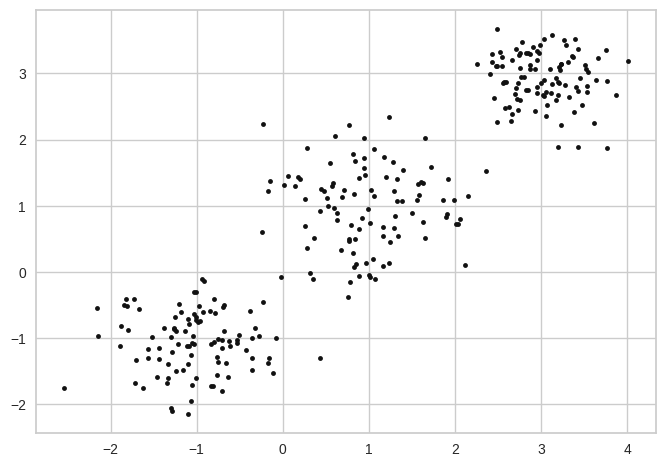

In [40]:
np.random.seed(7)

x1 = np.random.standard_normal((100,2))*0.6+np.ones((100,2))
x2 = np.random.standard_normal((100,2))*0.5-np.ones((100,2))
x3 = np.random.standard_normal((100,2))*0.4-2*np.ones((100,2))+5
X = np.concatenate((x1,x2,x3),axis=0)

plt.plot(X[:,0],X[:,1],'k.')
plt.show()

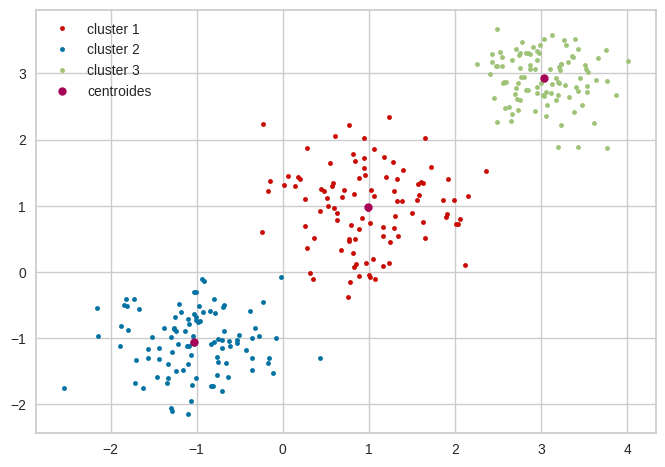

In [41]:
n = 3
k_means = KMeans(n_clusters=n)
k_means.fit(X)
centroides = k_means.cluster_centers_
etiquetas = k_means.labels_
plt.plot(X[etiquetas==0,0],X[etiquetas==0,1],'r.', label='cluster 1')
plt.plot(X[etiquetas==1,0],X[etiquetas==1,1],'b.', label='cluster 2')
plt.plot(X[etiquetas==2,0],X[etiquetas==2,1],'g.', label='cluster 3')

plt.plot(centroides[:,0],centroides[:,1],'mo',markersize=6, label='centroides')

plt.legend(loc='best')
plt.show()

# <FONT SIZE=5 COLOR="purple"> 2. ¿Cuántos clúster debemos seleccionar? </FONT>


- Determinar el número óptimo de clusters en un conjunto de datos es un problema fundamental en el agrupamiento. En $k$-means se requiere especificar de antemano el número de clústeres $k$ que se generarán.

- Desafortunadamente no hay una respuesta definitiva a esta pregunta. El número óptimo de clusters es algo subjetivo y depende del método utilizado para medir
similitudes y los parámetros utilizados para la partición.

Vamos a describir diferentes métodos para determinar el número óptimo de clusters para $k$-means. Estos métodos incluyen métodos directos y métodos de prueba estadísticos:

1. Métodos directos: consiste en optimizar un criterio, como el ***WCSS*** o la silueta media. Los métodos se denominan ***elbow method*** y ***silhouette***, respectivamente.

2. Métodos estadísticos de contraste: consiste en comparar la evidencia contra la hipótesis nula. Un ejemplo es la estadística de ***GAP***.



## <FONT SIZE=5 COLOR="purple"> 2.1 El método del codo </FONT>

La idea básica detrás del método $k$-means, es definir el número de clusters que minimizan la inercia ***WCSS***. Recordemos que ***WCSS*** mide la compacidad del agrupamiento y queremos que sea lo más pequeño posible.

El **método codo** analiza el ***WCSS*** como una función del número de clusters. Se debe elegir una cantidad de clusers de tal forma que agregar otro cluster no mejore mucho el valor ***WCSS***.

El número óptimo de clústeres se puede definir de la siguiente manera:

1. Calcule el algoritmo de clustering $k$-means para diferentes valores de $k$. Por ejemplo, puede variar $k$ de 1 a 10 grupos.

2. Para cada $k$, calcule ***WCSS***.

3. Trazar la curva de ***WCSS*** según el número de clusters $k$.

4. La ubicación de una curva (codo) en el plot generalmente se considera como un indicador del número adecuado de clusters.

Tenga en cuenta que el método del codo a veces es ambigüo.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters $k$, la varianza intra-cluster tiende a disminuir. Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el valor k que satisfaga que un incremento de k, no mejore sustancialmente la distancia media intra-cluster.
[ver](https://machinelearningparatodos.com/segmentacion-utilizando-k-means-en-python/)


<center><img src="https://github.com/Fabian830348/cursos/blob/a78eef65f7afa2e9096475bf1860843870f52276/Imagen/elbow.png?raw=true" alt="centered image" width="400" height="250"></center>

Este método utiliza los valores de la inercia obtenidos tras aplicar el K-means a diferente número de Clusters (desde 1 a $n$ Clusters), siendo la inercia la suma de las distancias al cuadrado de cada objeto del Cluster a su centroide:

$$inercia = \sum \limits_{k=1}^{n} \|x_k-\mu \|^2$$

Una vez obtenidos los valores de la inercia tras aplicar el K-means de 1 a $n$ Clusters, representamos en una gráfica lineal la inercia respecto del número de Clusters.

En esta gráfica se debería de apreciar un cambio brusco en la evolución de la inercia, teniendo la línea representada una forma similar a la de un brazo y su codo.

El punto en el que se observa ese cambio brusco en la inercia nos dirá el número óptimo de Clusters a seleccionar para ese conjunto de datos; o dicho de otra manera: el punto que representaría al codo del brazo será el número óptimo de Clusters para ese conjunto.

"within= [] ## Elbow Graph (codo), se tiende a elegir muchos grupos
for k in range(1,10):
    kmeanModel = KMeans(n_clusters=k).fit(nuevosACP)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,10)), y=within)
fig.show()


## <FONT SIZE=5 COLOR="purple"> 2.2 El método de la Silueta </FONT>

- El coeficiente de silueta mide qué tan bien se agrupa una observación y estima la ***distancia promedio entre clusters***.

- El plot de silueta muestra una medida de qué tan cerca está cada punto en un cluster de los puntos en los clusters vecinos.

Para cada observación $i$, el ancho de la silueta $s_i$ se calcula de la siguiente manera:

1. Para cada observación $i$, calculamos la disimilitud (distancia) promedio $a_i$, entre $i$ y todos los otros puntos del clúster al que pertenezca $i$.

$$a_i = \dfrac{1}{|C_i|-1} \sum \limits_{j \in C_i , i\neq j} d(i,j)$$

esto es, la distancia media entre $i$ y los otros puntos del mismo clúster. *¿Por qué se divide por esa expresión?*

2. Para todos los demás clusters $C$, a los que no pertenezca $i$, calcule el promedio de disimilitud $d(i,C)$ de $i$ con todos los puntos de $C$. La menor de estas $d(i,C)$ se define como $b_i = min_C\  d(i,C)$. El valor de $b_i$ puede verse como la disimilitud promedio entre $i$ y su cluster "vecino", es decir, el más cercano al que ***no*** pertenece.

$$b_i = \min \limits_{k \neq i}\dfrac{1}{|C_k|} \sum \limits_{j \in C_k} d(i,j)$$

3. Finalmente, el ancho de la silueta de la observación $i$ se define mediante la fórmula:

$$S_i = \frac{(b_i - a_i)}{max\{a_i, b_i\}}$$

El ancho de la silueta se puede interpretar de la siguiente manera:

- Primero, este valor está entre $-1$ y $1$.

- Las observaciones con un $S_i$ cercano a 1 están muy bien agrupadas.

- Un $S_i$ pequeño (alrededor de 0) significa que la observación se encuentra entre dos grupos.

- Las observaciones con un $S_i$ negativo probablemente estén ubicadas en el cluster incorrecto.

El algoritmo es similar al método del codo y se puede calcular de la siguiente manera:

1. Calcule el algoritmo $k$-means  para diferentes valores de $k$. Por ejemplo, variando $k$ de 1 a 10 grupos.

2. Para cada $k$, calcule la silueta promedio de las observaciones.

3. Trazar el gráfico según el número de clusters y la silueta promedio.

4. La ubicación del máximo se considera como el número apropiado de clusters.

# <FONT SIZE=5 COLOR="purple"> 3. Ejemplo de k-means </FONT>

Vamos a importar los siguientes datos

In [42]:
url_base = "https://raw.githubusercontent.com/lacamposm/Metodos_Estadisticos/main/data/"
USArrests = pd.read_csv(url_base + "USArrests.csv", index_col=0)
USArrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


Es importante escalar los datos ya que estamos trabajando con distancias entre elementos del conjunto de datos.

In [43]:
## Escalamos los datos
scaler = StandardScaler()
scaler.fit(USArrests)
df = pd.DataFrame(scaler.transform(USArrests),
                  columns = USArrests.columns,
                  index = USArrests.index)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814
Colorado,0.025976,0.402909,0.869548,1.883901


## <FONT SIZE=4 COLOR="magenta"> 3.1 Generación del modelo con $k=2$ </FONT>

Inicialmente, aplicaremos el algotitmo *kmeans* con dos clusters.

In [44]:
n = 2
kmeans = KMeans(n_clusters=n,                  ### Número de clusters
                random_state=0)                ### Semilla aleatoria.
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

Revisamos los atributos, es decir, la inercia y los centroides de los clústers.

In [45]:
## Inertia y centroides
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

104.96163315756871
[[-0.67675778 -0.68274685 -0.13306084 -0.57037591]
 [ 1.01513667  1.02412028  0.19959126  0.85556386]]


Los coloco como un DataFrame para visualizarlos mejor

In [46]:
centroides = pd.DataFrame(kmeans.cluster_centers_, columns = df.columns)
centroides

,Murder,Assault,UrbanPop,Rape
0,-0.676758,-0.682747,-0.133061,-0.570376
1,1.015137,1.024120,0.199591,0.855564


Podemos hacer un gráfica de los centroides para compararlos

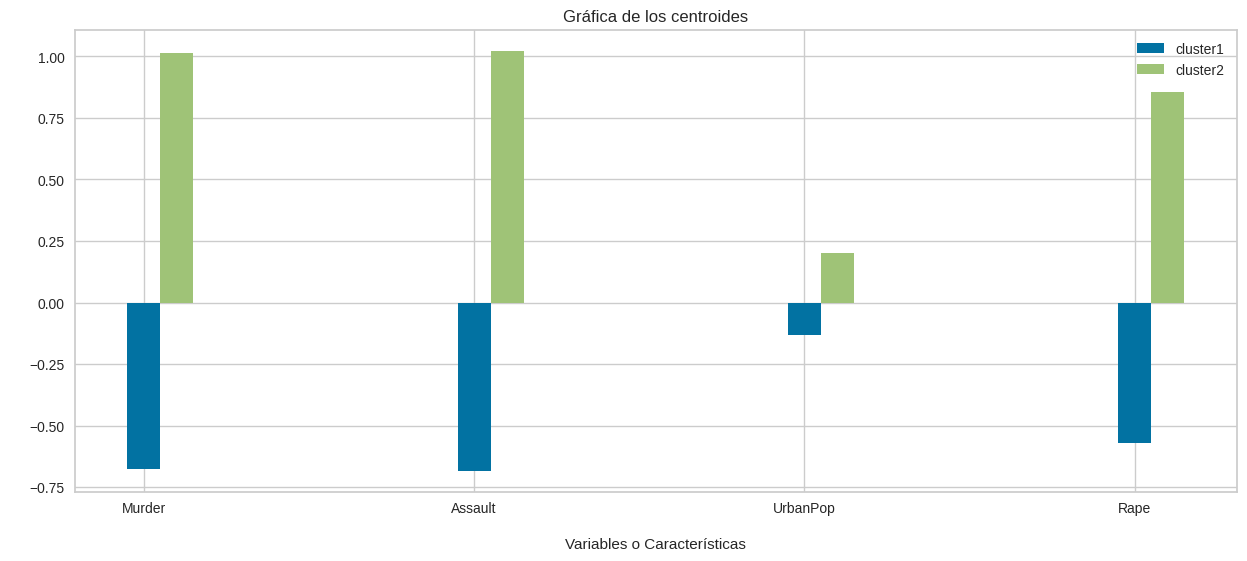

In [47]:
## Plot centroides.
plt.rcParams["figure.figsize"] = (15,6)
temp = centroides.iloc[0:4,0:5]
temp.index = ["cluster1","cluster2"]
X_axis, a = np.arange(len(temp.columns)), np.flip(np.arange(-0.1,0.1,0.1))
for i,index in enumerate(temp.index):
  plt.bar(X_axis -1*a[i], temp.loc[index],width=0.1, label = index)
plt.xticks(X_axis,temp.T.index)
plt.xlabel("\nVariables o Características",)
plt.ylabel(" ",)
plt.title("Gráfica de los centroides")
plt.legend()
plt.show()

Revisamos a cuál cluster está asignando cada medición

In [48]:
## Atributos.
print(kmeans.labels_)

[1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 0 0 0]


Ponemos está información en el DataFrame con la información del conjunto de datos

In [49]:
df_cluster = USArrests.copy()
df_cluster["cluster"] = kmeans.labels_
df_cluster

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,0
California,9.0,276,91,40.6,1
Colorado,7.9,204,78,38.7,1
Connecticut,3.3,110,77,11.1,0
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,1
Georgia,17.4,211,60,25.8,1


Veamos la media en cada uno de los clusters

In [50]:
df_cluster.groupby(by = ["cluster"]).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,4.870,114.433333,63.633333,15.943333
1,12.165,255.250000,68.400000,29.165000


Vamos a realizar una clasificación

In [51]:
X_nuevo = np.array([[13,	250,	47,	20]])
X_nescalado = scaler.transform(X_nuevo.reshape(1, -1))
new_labels = kmeans.predict(X_nescalado)
print(new_labels)

[1]


In [52]:
#vemos el representante del grupo, el usuario cercano a su centroide
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, df)
closest

array([26, 30])

In [53]:
users=df.index
for row in closest:
    print(users[row])

Nebraska
New Mexico


Para este ejemplo, como tenemos dos clústers podemos hacer una gráfica

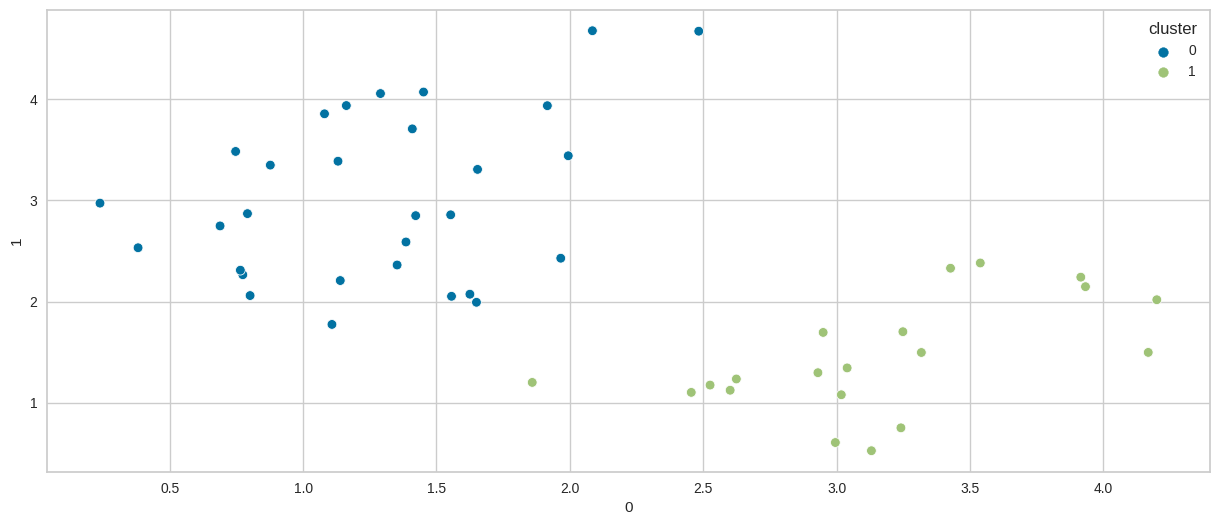

In [54]:
temp = pd.DataFrame(kmeans.transform(df),)
temp["cluster"] = kmeans.predict(df)
temp["cluster"] = temp["cluster"].astype("category")
sns.scatterplot(data = temp,
                x = 0,
                y = 1,
                hue = "cluster")
plt.show()


In [55]:
fig = px.scatter_3d(df_cluster, x='Assault', y='UrbanPop', z='Rape', color = "cluster")
fig.show()
fig.write_html("/content/file.html")

Analicemos un poco los grupos.

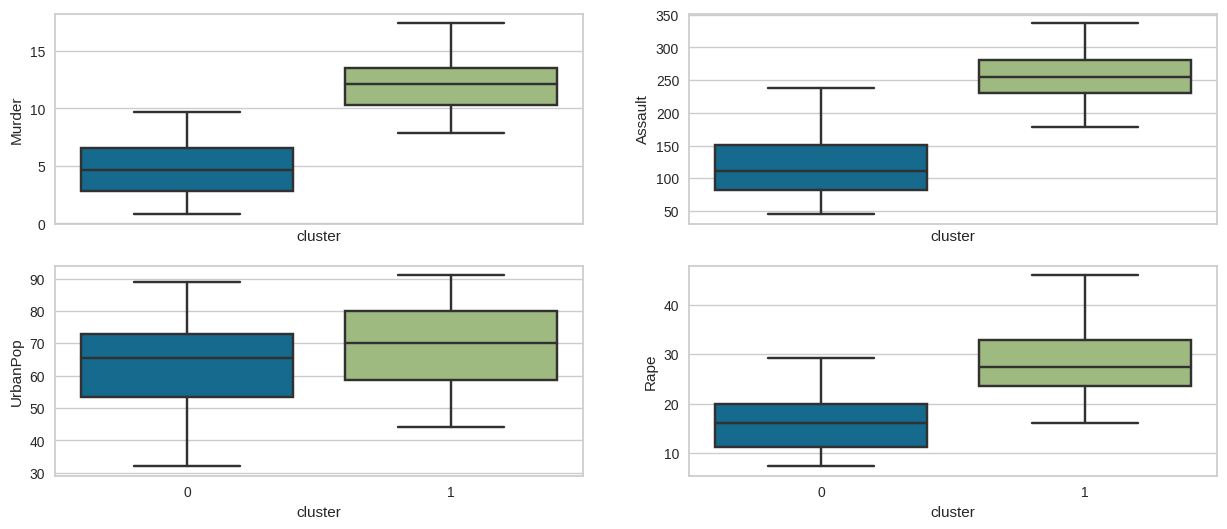

In [56]:
## Caso 2 clusters
df_Clusters2 = USArrests.copy()
df_Clusters2["cluster"] = kmeans.labels_
df_Clusters2["cluster"] = df_Clusters2["cluster"].astype("category")
## Box-plots
fig, axes = plt.subplots(2,2, sharex=True)
## Gráfica
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Murder", ax = axes[0,0])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Assault", ax = axes[0,1])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "UrbanPop", ax = axes[1,0])
sns.boxplot(data=df_Clusters2, x = "cluster", y = "Rape", ax = axes[1,1])
plt.show()

***Comentarios:***

1. El cluster 1 tiene una alta tasa delictiva y predomina la población urbana.

2. El cluster 0 tiene tasas bajas de delitos y una menor tasa que el cluster 1 de población urbana.

Note que la solución en este caso es bastante simple, pues solo está teniendo en consideración las tasas de crimenes altos con "población urbana" y tasa de crimenes bajos con "población rural". Esta solución parece ser buena, pues logra identificar los estados que tienen alto y bajo crimen.

## <FONT SIZE=4 COLOR="magenta"> 3.2 Selección de $k$ </FONT>

Para la selección del número de clústers $k$ usaremos:

- Método del codo
- Método de la silueta.

Para el método del codo podemos hacer la iteración sobre el número de grupos $k$ y generar la inercia $within$ y luego, representar gráficamente.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     float64
 2   UrbanPop  50 non-null     float64
 3   Rape      50 non-null     float64
dtypes: float64(4)
memory usage: 4.0+ KB


In [69]:
n = 40
within= []
for k in range(1,n):
    kmeanModel = KMeans(n_clusters=k).fit(df)
    within.append(kmeanModel.inertia_)
fig=px.line(x=list(range(1,n)),
            y=within,
            title = "Método del Codo-Gráfica")
fig.update_xaxes(title_text = "Número de Clústers")
fig.update_yaxes(title_text = "WCSS-Inertia")
fig.show()


También podemos usar una función de la librería *yellowbrick*

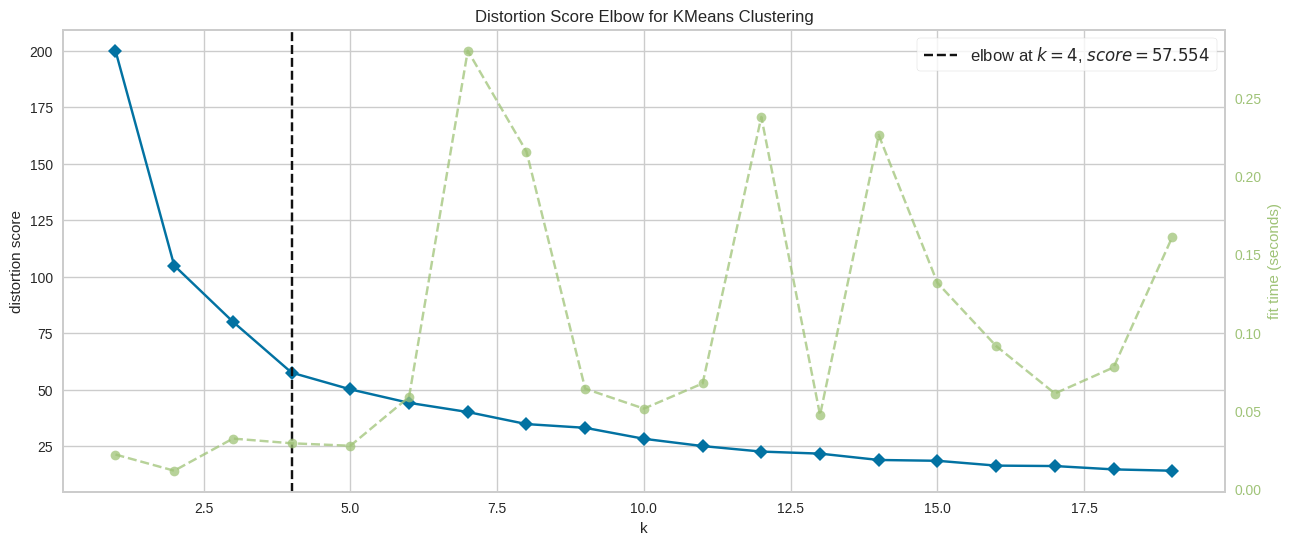

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [67]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()                                          # definimos el modelo
visualizer = KElbowVisualizer(model, k=(1,20))            # definimos el visualizador
visualizer.fit(df)                                        # Entrenamos con los datos
visualizer.show()                                         # mostramos la gráfica

Según el gráfico anterior podemos usar, por ejemplo, $k=2$ o $k=4$. Sin embargo, el último valor parece más apropiado ya que para los valores siguientes el cambio en la inercia es menor.

Ahora, veamos que no sugiere el método de la silueta

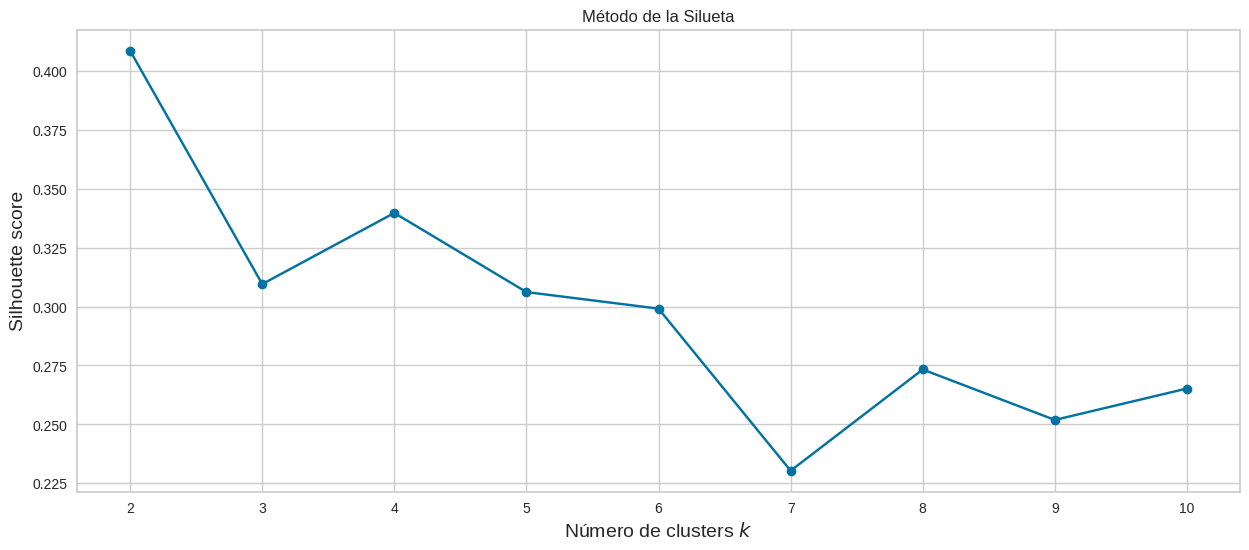

In [60]:
models = [KMeans(n_clusters=n, random_state=0 ).fit(df) for n in range(2,11)]
silhouette_scores = [silhouette_score(df, model.labels_) for model in models]
plt.plot(list(range(2, 11)), silhouette_scores, "bo-")
plt.xlabel("Número de clusters $k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Método de la Silueta")
plt.show()

Ahora, vamos a repetir el ejercicio con $k=4$ clusters.

In [70]:
n = 10                                   # número de clusters
kmeans_4 = KMeans(n_clusters=n,         # Definir el modelo
                random_state=0)         # Semilla aleatoria.
kmeans_4.fit(df)                        # Entrenar el modelo

KMeans(n_clusters=10, random_state=0)

In [71]:
# Revisamos los atributos importantes del modelo: inercia y los centroides
print(kmeans_4.inertia_)
print(kmeans_4.cluster_centers_)

28.311639397122548
[[-1.06075968 -1.08453581 -0.44643839 -0.84775254]
 [ 0.89801444  1.49139258  0.60435675  1.11601851]
 [-0.76257011 -0.53850456  1.25337729 -0.53550482]
 [ 1.55668205  1.46553402 -1.38690338 -0.28745278]
 [-0.18275707 -0.26002774  0.00526088 -0.07562684]
 [ 1.62625962  0.60896914 -0.33428047  0.30122146]
 [ 0.44344101  0.88775677  1.2417461   2.21463743]
 [-1.12901195 -1.2383019  -1.62883218 -1.24586837]
 [ 0.83771388  0.77462556  1.21848371  0.4279437 ]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]]


Colocaremos la información en un DataFrame y luego haremos las gráficas de los boxplots para hacer el análisis.

In [72]:
#4 Caso 4 clusters
df_Clusters4 = USArrests.copy()
df_Clusters4["cluster"] = kmeans_4.labels_
df_Clusters4.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,5
Alaska,10.0,263,48,44.5,9
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,4
California,9.0,276,91,40.6,6


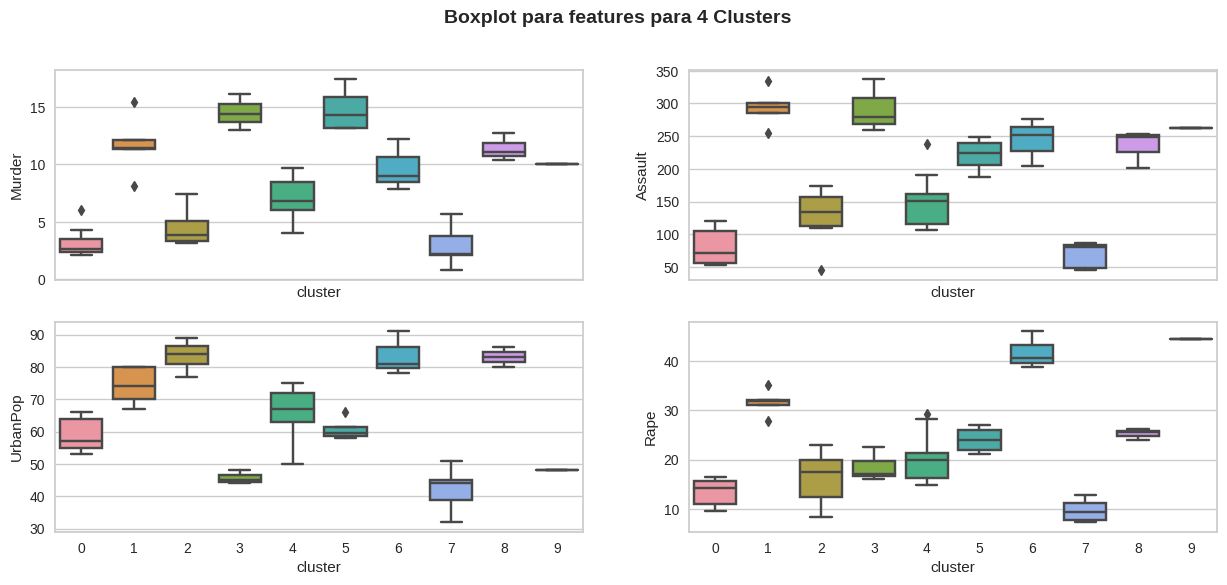

In [73]:
# Box-plots
fig, axes = plt.subplots(2,2, sharex=True)
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Murder", ax = axes[0,0])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Assault", ax = axes[0,1])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "UrbanPop", ax = axes[1,0])
sns.boxplot(data=df_Clusters4, x = "cluster", y = "Rape", ax = axes[1,1])
fig.suptitle("Boxplot para features para 4 Clusters", fontsize=14, fontweight="bold",)
plt.show()

***Comentarios:***

1. El cluster 3 tiene alto el índice de asesinatos. El cluster 2 tiene un menor índice de asesinatos.

2. *Assault* y *Murder* tiene un comportamiento similar para los clusters.

4. Note que el cluster 1 tiene una tasa más alta de asaltos que el cluster 3. A su vez el cluster 3 tiene más asesinatos. Los clusters 0 y 2 tiene un compartamiento similar en ambas features (*Assault* y *Murder*).

5. En cuanto a *UrbanPop* el cluster 0 y tienen cluster 1 tiene las tasas más altas. Por su supuesto los individuos en los cluster 2 y 3 tiene una tasa baja de población urbana.

Note que podemos caracterizar los cluster así:

- ***Cluster 0:*** Baja tasa de delitos, y una alta tasa de población urbana.

- ***Cluster 1.*** Alta tasa en todas las features.

- ***Cluster 2.*** Baja tasa en todas las features.

- ***Cluster 3.*** Alta tasa de `Murder` y `Assault` con baja tasa de población urbana y violaciones.

Esta solución parece ser buena, en este caso podemos pensar en una segmentación basados en la feature *UrbanPop*, note que acá tenemos más información que con 2 clusters.

# <FONT SIZE=5 COLOR="green"> 4. Clustering para review en PLN</FONT>

Para este ejercicio vamos a utilizar las herramientas vistas antes aplicadas a un conjunto de datos de *review*.

Para trabajar en clase se realizará:

1. Carga de los datos

```python
url= "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/reviews.csv"
```
2. Exploración de los datos
3. Limpieza- Normalización. Como los datos están en español. Vamos a usar

```python
from nltk.corpus import stopwords
stopwords_sp = stopwords.words('spanish')
```
4. Construcción de la matriz *TF+iDF*.
5. Seleccionar el número de clusters: codo y silueta
6. Construir el modelo y analizarlo

In [65]:
url= "https://raw.githubusercontent.com/Fabian830348/Bases_Datos/master/reviews.csv"

In [66]:
datos = pd.read_csv(url_base, index_col=0)

HTTPError: ignored

***¿Qué hace el siguiente código?***

In [ ]:
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = base['cluster'].value_counts()
clust_cnt_pct = base['cluster'].value_counts(normalize=True)

centroids = model.cluster_centers_

terms = tfidf_vect.get_feature_names_out()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"Tiene {clust_cnt[i]} registros ({clust_cnt_pct[i]:.2%} de los datos)")
    print()

    print("TÉRMINOS MÁS REPRESENTATIVOS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()

    print(f"DOCUMENTOS MÁS REPRESENTATIVOS")
    for vecino in base.iloc[nbrs.kneighbors([centroids[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()

    print()
    print("********************************************")
    print()

In [ ]:
%%html
<center><marquee style='width: 60%; color: blue;'><b>Muchas gracias por asistir a la clase</b></marquee><center>